In [1]:

import pgeon.policy_graph as PG
from pathlib import Path
from example.environment import SelfDrivingEnvironment
from example.discretizer.discretizer import AVDiscretizer
import pandas as pd
from nuscenes import NuScenes
import numpy as np

In [2]:
city = 'boston-seaport'
env = SelfDrivingEnvironment(city)
disc = AVDiscretizer(env)
    # Generate Policy Graph
    #from existing csv file
    #pg = PG.PolicyGraph.from_nodes_and_edges(str(Path(data_folder) / 'nuscenes_nodes.csv'), str(Path(data_folder) / 'nuscenes_edges.csv'), env, env.discretizer  )

    #from raw data
dtype_dict = {
        'modality': 'category',  # for limited set of modalities, 'category' is efficient
        'scene_token': 'str',  
        'steering_angle': 'float64',  
        'timestamp': 'str',  # To enable datetime operations
        'rotation': 'object',  # Quaternion (lists)
        'x': 'float64',
        'y': 'float64',
        'z': 'float64',
        'yaw': 'float64',  
        'velocity': 'float64',
        'acceleration': 'float64',
        'yaw_rate': 'float64'
        #'is_destination': 'str'
    }

df = pd.read_csv(Path('/home/saramontese/Desktop/MasterThesis/example/dataset/data/sets/nuscenes') / "train_v1.0-mini_lidar_0.csv", dtype=dtype_dict, parse_dates=['timestamp'])
val_df = pd.read_csv(Path('/home/saramontese/Desktop/MasterThesis/example/dataset/data/sets/nuscenes') / "test_v1.0-mini_lidar_0.csv", dtype=dtype_dict, parse_dates=['timestamp'])
df = df[df['location'] == city]
val_df = val_df[val_df['location'] == city]

pg = PG.PolicyGraph(env, disc)

In [3]:
pg = pg.fit(df, update=False, verbose=False)

Fitting PG from scenes...:   0%|          | 0/4 [00:00<?, ?it/s]

BlockProgress(INTERSECTION)
BlockProgress(INTERSECTION)
BlockProgress(INTERSECTION)
BlockProgress(INTERSECTION)
BlockProgress(INTERSECTION)
BlockProgress(INTERSECTION)
BlockProgress(INTERSECTION)
BlockProgress(INTERSECTION)
BlockProgress(INTERSECTION)
BlockProgress(INTERSECTION)
BlockProgress(INTERSECTION)


AttributeError: 'tuple' object has no attribute 'next_intersection'

In [ ]:
#pg._save_csv('/home/saramontese/Desktop/MasterThesis/example/dataset/data/policy_graphs/pg_nodes.csv', '/home/saramontese/Desktop/MasterThesis/example/dataset/data/policy_graphs/pg_edges.csv','/home/saramontese/Desktop/MasterThesis/example/dataset/data/policy_graphs/pg_traj.csv')

# TEST AGENTS

In [ ]:
greedy_agent = PG.PGBasedPolicy(pg, mode=PG.PGBasedPolicyMode.GREEDY, node_not_found_mode=PG.PGBasedPolicyNodeNotFoundMode.FIND_SIMILAR_NODES)
stochastic_agent = PG.PGBasedPolicy(pg, mode=PG.PGBasedPolicyMode.STOCHASTIC, node_not_found_mode=PG.PGBasedPolicyNodeNotFoundMode.FIND_SIMILAR_NODES)
random_agent = PG.PGBasedPolicy(pg, mode=PG.PGBasedPolicyMode.STOCHASTIC, node_not_found_mode=PG.PGBasedPolicyNodeNotFoundMode.RANDOM_UNIFORM)

In [ ]:
scene_test = val_df['scene_token'].unique()[43]
example_scene_df = val_df[val_df['scene_token']==scene_test][['x','y','velocity', 'yaw_rate', 'acceleration', 'yaw', 'steering_angle']]


IndexError: index 43 is out of bounds for axis 0 with size 0

In [ ]:
for scene in val_df['scene_token'].unique():
    print(f'SCENE: {scene}')
    example_scene_df = val_df[val_df['scene_token']==scene][['x','y','velocity', 'yaw_rate', 'acceleration', 'yaw', 'steering_angle']]
    stochastic_agent.test_scene_trajectory(example_scene_df, max_steps=20, render=False, verbose = False)

print(f"mean ADE: {np.mean(stochastic_agent.pg_metrics['ADE'])}")
print(f"mean FDE: {np.mean(stochastic_agent.pg_metrics['FDE'])}")

---------------------------------
* START TESTING

Actual state: [1101.6246655482323, 1194.960742062142, 8.066120189697818, -0.0149526060529721, 0.260762064933797, 2.5378086432271503, -0.0959211333477157]
Action: Action.BRAKE
Actual state: (1098.3046783136704, 1197.2505583191828, 8.065620189697817, -0.0149526060529721, -0.001, 2.530332340200664, 0.0)
Action: Action.BRAKE
Actual state: (1095.0021077962724, 1199.5649881061343, 8.065120189697817, -0.0149526060529721, -0.001, 2.522856037174178, 0.0)
Action: Action.STRAIGHT
Actual state: (1091.7171364474054, 1201.90389899706, 8.065120189697817, -0.0149526060529721, 0, 2.515379734147692, 0.0)
Action: Action.BRAKE
Actual state: (1088.4497431486955, 1204.2673037338989, 8.064620189697816, -0.0149526060529721, -0.001, 2.5079034311212056, 0.0)
Action: Action.BRAKE
Actual state: (1085.2003119927217, 1206.6549221840721, 8.064120189697816, -0.0149526060529721, -0.001, 2.5004271280947195, 0.0)
Action: Action.BRAKE
Actual state: (1081.9690223925202, 1

/home/saramontese/.local/lib/python3.8/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/saramontese/.local/lib/python3.8/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


* True agent path
                x            y  velocity  yaw_rate  acceleration       yaw  \
6274  1101.624666  1194.960742  8.066120 -0.014953      0.260762  2.537809   
6275  1098.385443  1197.246994  7.930979 -0.022568     -0.270331  2.526527   
6276  1095.167132  1199.579104  7.960285 -0.021746      0.058697  2.515669   
6277  1092.048681  1201.905684  7.791711 -0.024725     -0.337593  2.503323   
6278  1088.931846  1204.276975  7.834896 -0.021913      0.086393  2.492369   
6279  1085.799997  1206.701031  7.922165  0.001391      0.174571  2.493065   
6280  1082.734854  1209.021713  7.699921  0.025988     -0.445112  2.506041   
6281  1080.038010  1211.003114  7.444046  0.032053     -0.569181  2.520450   
6282  1077.074189  1213.140034  7.317562  0.025487     -0.253308  2.533177   
6283  1074.150789  1215.178779  7.129938  0.017617     -0.375340  2.541983   
6284  1071.149814  1217.248449  6.619047  0.010861     -0.927624  2.547964   
6285  1068.549668  1219.013743  6.273351  0.00

/home/saramontese/.local/lib/python3.8/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/saramontese/.local/lib/python3.8/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


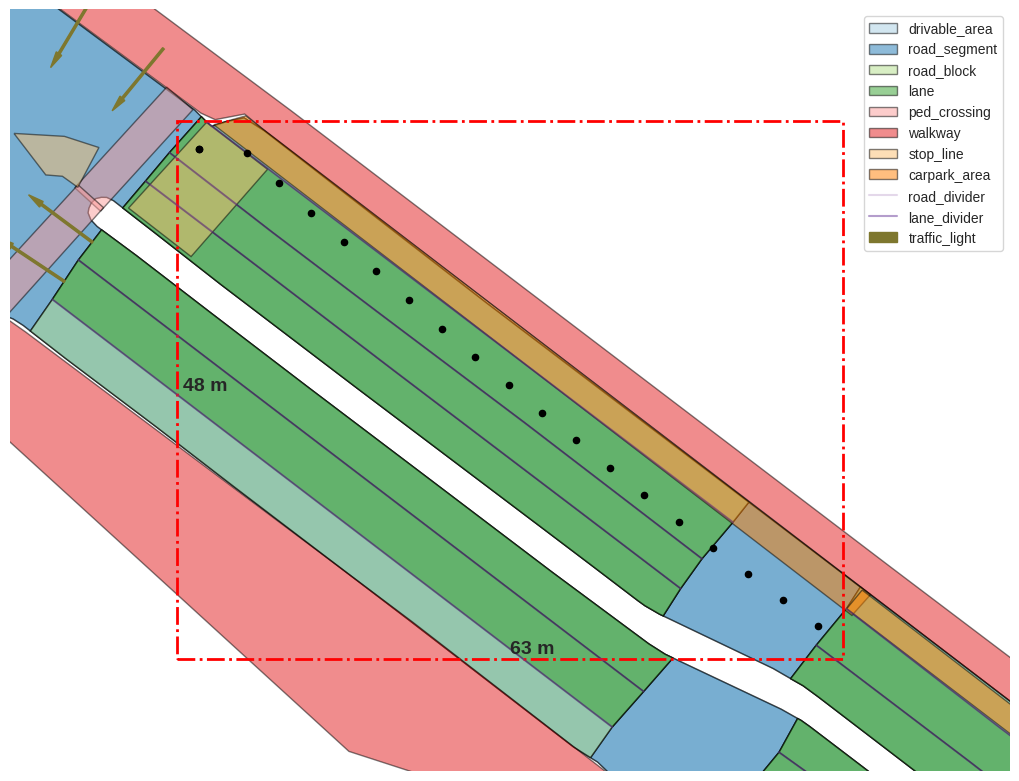

Error in callback <function flush_figures at 0x7fc62f505ee0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
stochastic_agent.test_scene_trajectory(example_scene_df, max_steps=20, render=True, verbose = True)
#diff_aer, diff_std, transferred_learning = stochastic_agent.compare()

In [ ]:
for scene in val_df['scene_token'].unique():
    print(f'SCENE: {scene}')
    example_scene_df = val_df[val_df['scene_token']==scene][['x','y','velocity', 'yaw_rate', 'acceleration', 'yaw', 'steering_angle']]
    greedy_agent.test_scene_trajectory(example_scene_df, max_steps=20, render=False, verbose = False)

print(f"mean ADE: {np.mean(greedy_agent.pg_metrics['ADE'])}")
print(f"mean FDE: {np.mean(greedy_agent.pg_metrics['FDE'])}")

SCENE: 010fb5bcc7984d0f8f07f99e02366df1
---------------------------------
* START TESTING

ADE: 3.9384507519009526 and FDE: 12.841699535463187 --> Episode Mean Time: 0.9437777996063232
* END TESTING
---------------------------------
* RESULTS
SCENE: 098c11f50ff2425a9ff994e004de1216
---------------------------------
* START TESTING

No nearest states available.
No nearest states available.
No nearest states available.
No nearest states available.
No nearest states available.
No nearest states available.
No nearest states available.
No nearest states available.
No nearest states available.
No nearest states available.
No nearest states available.
No nearest states available.
No nearest states available.
No nearest states available.
No nearest states available.
No nearest states available.
No nearest states available.
No nearest states available.
No nearest states available.
No nearest states available.
ADE: 27.102158746500216 and FDE: 48.344892764714785 --> Episode Mean Time: 0.655642271

---------------------------------
* START TESTING

Actual state: [1101.6246655482323, 1194.960742062142, 8.066120189697818, -0.0149526060529721, 0.260762064933797, 2.5378086432271503, -0.0959211333477157]
Action: Action.BRAKE
Actual state: (1098.3046783136704, 1197.2505583191828, 8.065620189697817, -0.0149526060529721, -0.001, 2.530332340200664, 0.0)
Action: Action.STRAIGHT
Actual state: (1095.0021077962724, 1199.5649881061343, 8.065620189697817, -0.0149526060529721, 0, 2.522856037174178, 0.0)
Action: Action.STRAIGHT
Actual state: (1091.7169327944362, 1201.904043998674, 8.065620189697817, -0.0149526060529721, 0, 2.515379734147692, 0.0)
Action: Action.BRAKE
Actual state: (1088.4493369325144, 1204.267595255632, 8.065120189697817, -0.0149526060529721, -0.001, 2.5079034311212056, 0.0)
Action: Action.BRAKE
Actual state: (1085.1997043144086, 1206.655361736239, 8.064620189697816, -0.0149526060529721, -0.001, 2.5004271280947195, 0.0)
Action: Action.BRAKE
Actual state: (1081.9682143644152, 1209

/home/saramontese/.local/lib/python3.8/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/saramontese/.local/lib/python3.8/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/home/saramontese/.local/lib/python3.8/site-packages/nuscenes/map_expansion/map_api.py:1888: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if new_polygon.geom_type is 'Polygon':
/home/saramontese/.local/lib/python3.8/site-packages/nuscenes/map_expansion/map_api.py:1925: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if layer_name is 'traffic_light':
/home/saramontese/.local/lib/python3.8/site-packages/nuscenes/map_expansion/map_api.py:1971: SyntaxWarning

KeyboardInterrupt: 

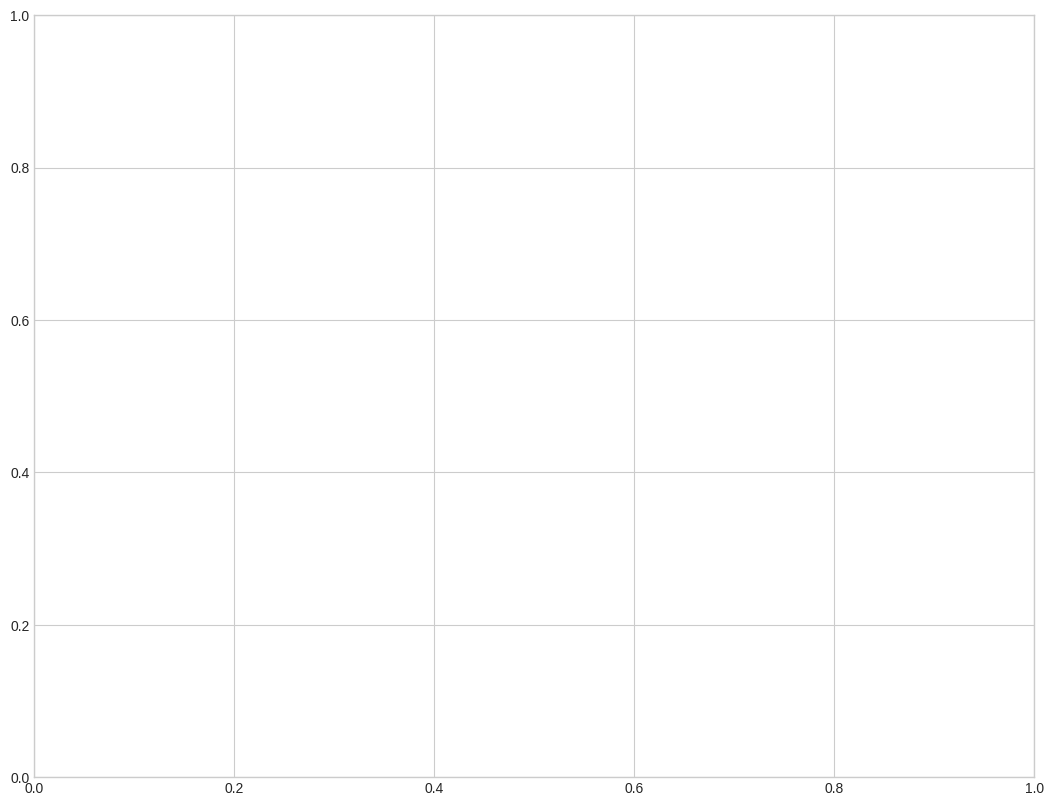

In [ ]:
greedy_agent.test_scene_trajectory(example_scene_df, max_steps=20, render=True, verbose = True)
#diff_aer, diff_std, transferred_learning = greedy_agent.compare()

---------------------------------
* START TESTING

Actual state: [1294.687240740777, 792.3926376383857, 5.813254030953955, -0.0799596719840816, 1.183060465301501, -2.28299957461015, -0.4432416544945889]
Action: Action.TURN_LEFT
Actual state: (1292.7877511304896, 790.1925422251115, 5.813254030953955, -0.0799596719840816, 0, -2.3229794106021906, -0.1932416544945889)
Action: Action.GAS
Actual state: (1290.8018433545801, 788.0701259340218, 5.813754030953954, -0.0799596719840816, 0.001, -2.3629592465942313, 0.0)
Action: Action.BRAKE
Actual state: (1288.732513271512, 786.0286051796776, 5.813254030953955, -0.0799596719840816, -0.001, -2.402939082586272, 0.0)
Action: Action.TURN_LEFT
Actual state: (1286.5834236841972, 784.0715935412871, 5.813254030953955, -0.0799596719840816, 0, -2.4429189185783127, 0.25)
Action: Action.BRAKE_TURN_LEFT
Actual state: (1284.3578312440914, 782.2020430879311, 5.812754030953955, -0.0799596719840816, -0.001, -2.4828987545703534, 0.5)
Action: Action.BRAKE_TURN_RIGHT


/home/saramontese/.local/lib/python3.8/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/saramontese/.local/lib/python3.8/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


* True agent path
                x           y  velocity  yaw_rate  acceleration       yaw  \
3005  1294.687241  792.392638  5.813254 -0.079960      1.183060 -2.283000   
3006  1292.563691  790.005294  6.391863 -0.048951      1.157507 -2.307469   
3007  1290.118685  787.377907  7.171915 -0.031030      1.558763 -2.322997   
3008  1287.574552  784.714430  7.368670 -0.015665      0.393620 -2.330828   
3009  1285.049244  782.061085  7.327732 -0.001177     -0.081894 -2.331416   
3010  1282.676459  779.601120  6.844771  0.002000     -0.967211 -2.330417   
3011  1280.304536  777.109334  6.882104  0.024477      0.074684 -2.318182   
3012  1277.971440  774.582729  6.872398  0.037720     -0.019396 -2.299306   
3013  1275.698458  772.026567  6.842816  0.039274     -0.059177 -2.279674   
3014  1273.577349  769.541497  6.536097  0.040041     -0.613594 -2.259659   
3015  1271.641609  767.183210  6.103344  0.024356     -0.865698 -2.247483   
3016  1270.143953  765.327205  5.965506  0.014358     -0.3

/home/saramontese/.local/lib/python3.8/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/saramontese/.local/lib/python3.8/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


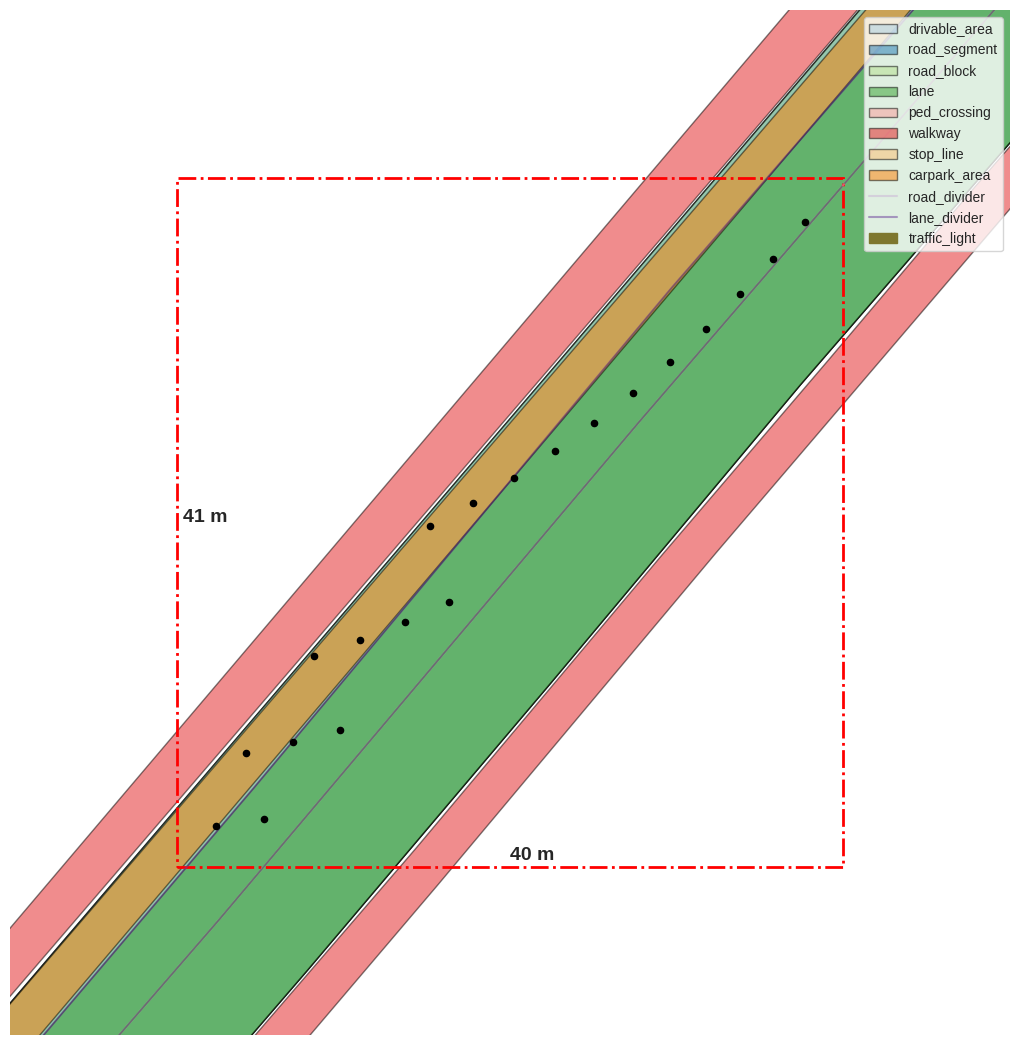

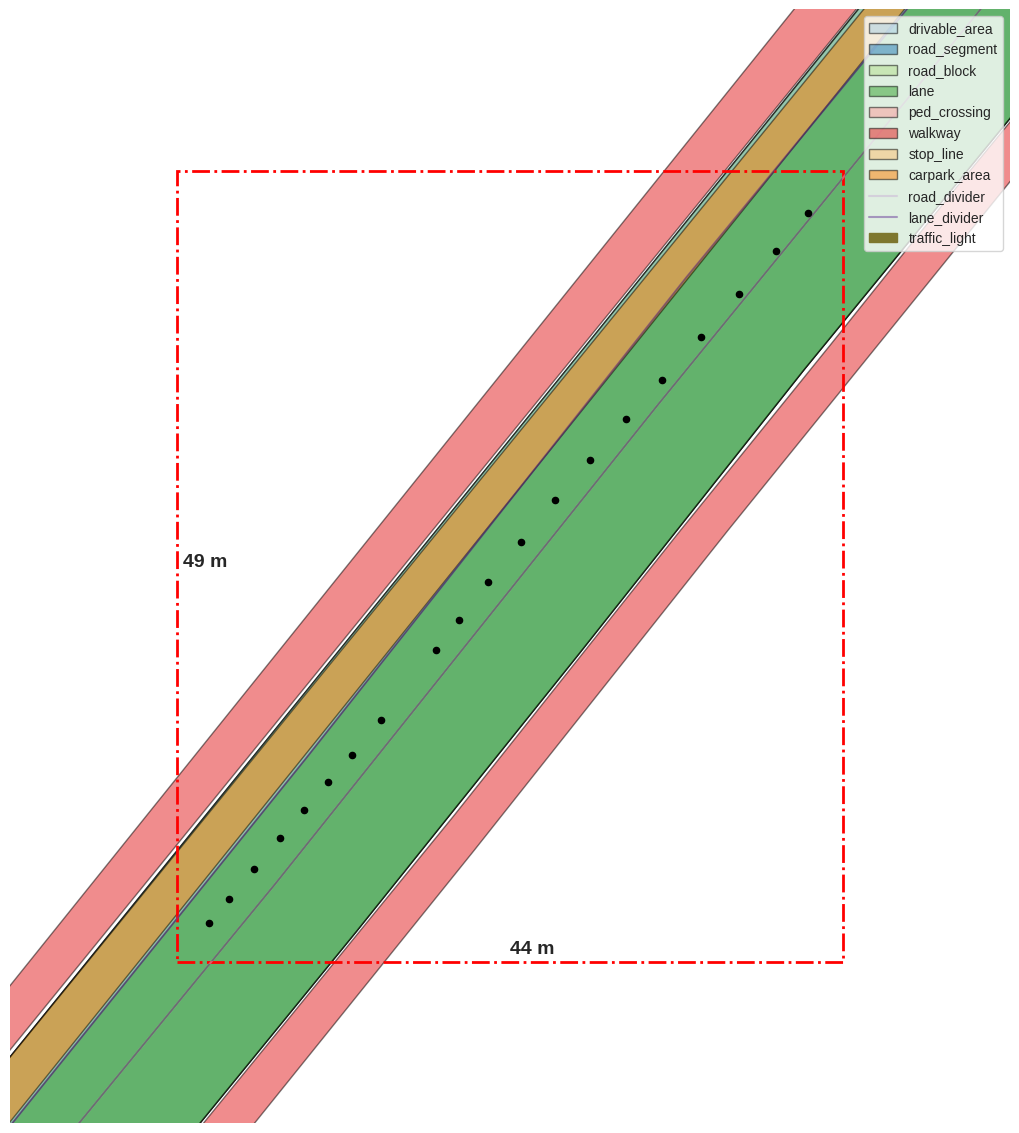

In [ ]:
random_agent.test_scene_trajectory(example_scene_df, max_steps=20, render=True, verbose = True)
#diff_aer, diff_std, transferred_learning = random_agent.compare()